In [ ]:
import requests
import pandas as pd

In [3]:


API_KEY = "RGAPI-8bf19888-4963-4e86-a94b-bfa14fbbfa09"
REGION = "americas"
match_id = "NA1_5349296158"  

url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={API_KEY}"
timeline = requests.get(url).json()



In [9]:
# Extract CS per minute for your player
puuid = "4WU60VKd11pKuuSBe2lnGekDpuOY3b_uzQIGNzS6uuo7ymRmmNlfZ7DIAYSfhkUmlqOkE1jbfxPJRQ"

#participantId from the match data
match_detail = requests.get(
    f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
).json()

participantId = None
for p in match_detail["info"]["participants"]:
    if p["puuid"] == puuid:  
        participantId = p["participantId"]

# parse timeline using participantId
timeline = requests.get(
    f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={API_KEY}"
).json()

records = []
for frame in timeline["info"]["frames"]:
    minute = frame["timestamp"] // 60000
    pdata = frame["participantFrames"][str(participantId)]
    cs = pdata["minionsKilled"] + pdata["jungleMinionsKilled"]

    # avoid division by zero at minute 0
    cs_per_min = cs / minute if minute > 0 else 0

    records.append({
        "minute": minute,
        "cs": cs,
        "cs_per_min": cs_per_min
    })

df = pd.DataFrame(records)
print(df.head(10))




   minute  cs  cs_per_min
0       0   0    0.000000
1       1   0    0.000000
2       2   0    0.000000
3       3   5    1.666667
4       4  12    3.000000
5       5  18    3.600000
6       6  23    3.833333
7       7  25    3.571429
8       8  27    3.375000
9       9  36    4.000000


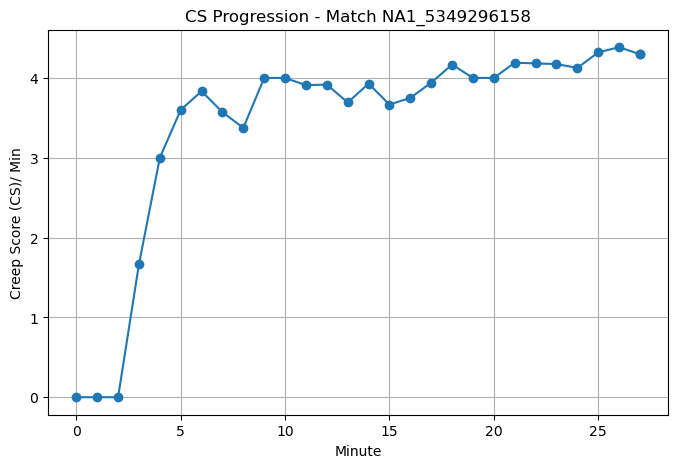

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df["minute"], df["cs_per_min"], marker="o")
plt.title(f"CS Progression - Match {match_id}")
plt.xlabel("Minute")
plt.ylabel("Creep Score (CS)/ Min")
plt.grid(True)
plt.show()